In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Implimenting K Means Clustering Algorithm from Scratch

In [2]:
class KMeansClustering: #Define the kmeans cluster class
    def __init__(self, k = 3): # add constructor
        self.k = k
        self.centroid = None
        
    @staticmethod # An instance of the class itself. Returns the euclidian distance between each data point and a centroid
    def euc(data_points, centroid): 
        return np.sqrt(np.sum((centroid - data_points)**2, axis=1))
    
    def fit(self, X, max_iter = 200):
        self.centroid = np.random.uniform(np.amin(X, axis = 0), np.amax(X, axis = 0), size = (self.k, X.shape[1])) #initializing ALL centroids with shape within the bounds of data X
        
        for _ in range(max_iter):
            y = [] 
            
            for data_points in X:
                distances = KMeansClustering.euc(data_points, self.centroid) # list of distances between a dp and all the centroids
                centroid_num = np.argmin(distances)#The index of the centroid that has the smallest dist to the current point
                y.append(centroid_num)
            y = np.array(y) #for each data point, centroids (their incides) that are closest to it.
            
            centroid_indices = []
            
            for i in range(self.k):
                centroid_indices.append(np.argwhere(y == i)) #returns the indices of the data points belonging to each cluster, 
                #essentially grouping them 
                
            centroid_centers = []
            
            for i, indices in enumerate(centroid_indices):
                if len(indices) == 0: #calculates length of the list of indices belonging to a cluster. If it is 0 then there
                    #are no data points belonging to that centroid and as a result it is not updated. 
                    centroid_centers.append(self.centroid[i])
                else:
                    centroid_centers.append(np.mean(X[indices], axis = 0)[0])#contains list of mean dist between a centroid
                    # and the data points associated with that centroid
            if np.max(self.centroid - np.array(centroid_centers)) < 0.0001:
                break #if the difference between the last and the current location is small then break
            else:
                self.centroid = np.array(centroid_centers) #This is where the positions of the centroids are finally updated
        return y

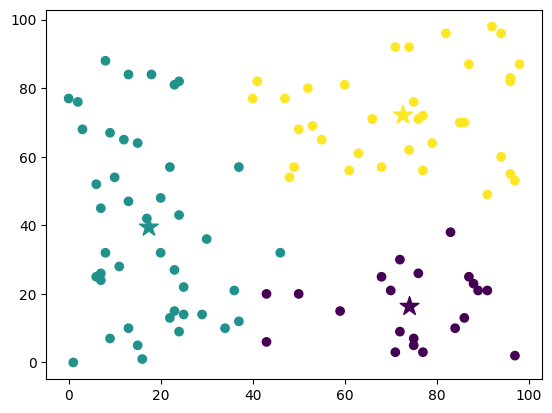

In [3]:
#Cluster randomly distributed data 
np.random.seed(1)
points = np.random.randint(0,100,(100,2))

kmeans = KMeansClustering(k = 3)
labels = kmeans.fit(points)

plt.scatter(points[:, 0], points[:, 1], c = labels)
plt.scatter(kmeans.centroid[:, 0], kmeans.centroid[:, 1], c = range(len(kmeans.centroid)), marker = "*", s = 200)
plt.show()

# 2. Using K means from Scikit to Cluster Customer Data

In [4]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df = df.drop('CustomerID', axis = 1)

In [5]:
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of squared distance')

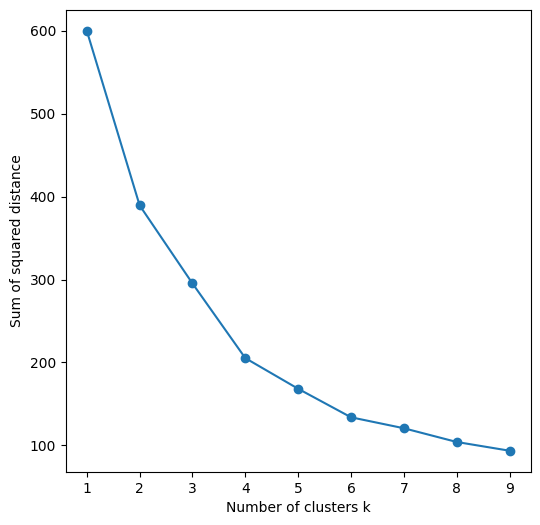

In [6]:
# Select the features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)# standardize data such that the 3 features are easy to compare 

sse = []
list_k = list(range(1, 10))

for k in list_k:#Implimenting Elbow method to determine the best cluster number for the given data
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)# sum of sqrt distances of the of samples belonging to a cluster
    #from my experience the values plateau as the cluster number increases, highlighting diminishing
    #returns

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')

In [7]:
# # Create and fit the model
model = KMeans(n_clusters=5) # Even though inertia value dec until cluster 9, limiting cluster to 5 because it is 
#easier to analyze less clusters + the decrease in inertia values above 5 is not significant. 
model.fit(scaled_features)

# # Get the cluster labels
labels = model.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


The above data gives us an understanding of how each of the 3 features are distributed. It shows that there are wide ranges of age and spending score for example, indicating the diversity of customers in the data set. 

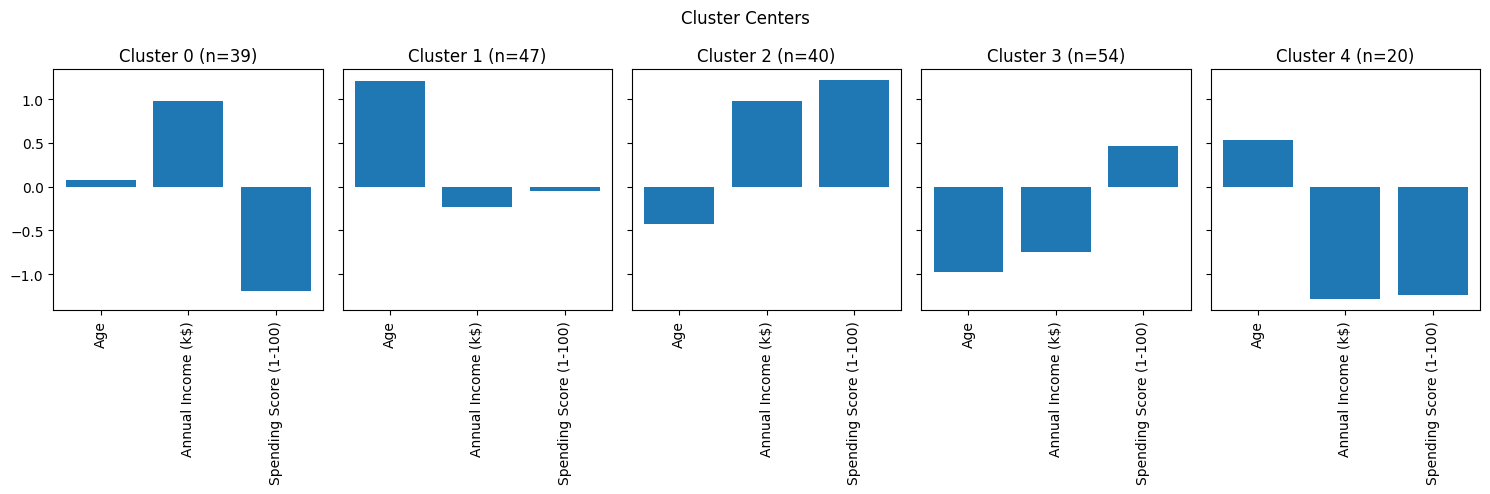

In [9]:
# Get the cluster centers
centers = model.cluster_centers_

# Count the number of samples in each cluster
counts = np.bincount(model.labels_)

# Create a figure and axes with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(centers), figsize=(15, 5), sharey=True)
fig.suptitle('Cluster Centers')

# Create a bar graph for each cluster center
for i, center in enumerate(centers):
    axes[i].bar(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], center)
    axes[i].set_title(f'Cluster {i} (n={counts[i]})')
    plt.sca(axes[i])
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

# 3. Analysis

In the first cluster, the average age is significantly higher than the overall average. The corresponding average annual income and spending score are very close to the overall average. In the second cluster, the average age is below the average, but the annual income and spending score are the highest among all the clusters. In the 3rd cluster, the age is average, the annual income is quite high, but the spending score is very low. In the 4th cluster, the age is above the average, but together, the annual income and spending score are the lowest of all the clusters. In the last cluster, the average age is significantly below the average, and so is the annual income, but the spending score is above the average. 

Cluster 1: This cluster represents customers who are significantly older than average, with their annual income and spending score close to the average. This could represent a group of middle-aged to senior customers who have stable income and moderate spending habits. Advertisements might not be the most effective on this group. 

Cluster 2: Customers in this cluster are younger than average, but they have the highest annual income and spending score among all clusters. This group could represent young professionals or entrepreneurs who have high earning and spending power. They could be the primary target for marketing high-end products or luxury goods.

Cluster 3: This cluster includes customers of average age with high annual income but very low spending score. These could be high earners who are also high savers, not spending much despite their high income. They might be the target audience for quality-of-life products. 

Cluster 4: Customers in this cluster are slightly older than average, with the lowest annual income and spending score among all clusters. This group might represent retirees or people in lower-income brackets. They could be targeted for discounted or value-for-money products.

Cluster 5: This cluster consists of fairly young customers with below-average annual income but above-average spending score. These could be students / teenagers, from wealthier backgrounds. Lifestyle and fashion products might suit this group. 

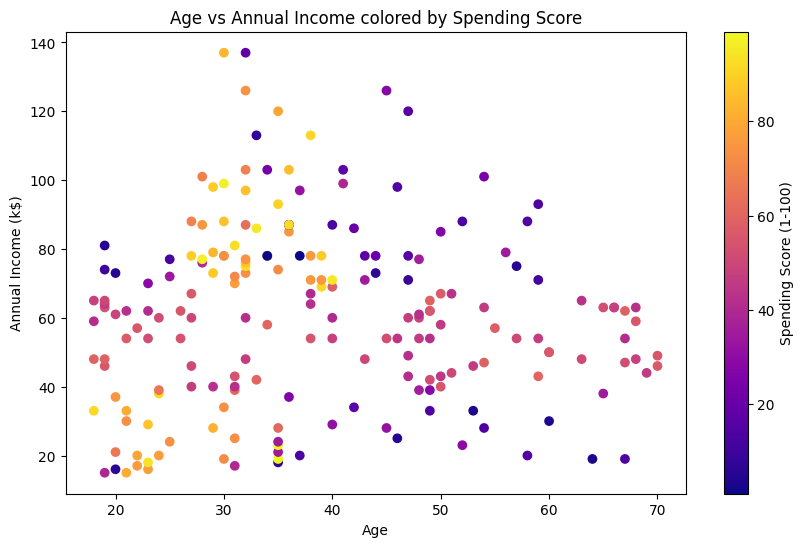

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Spending Score (1-100)'], cmap='plasma')
plt.colorbar(label='Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income colored by Spending Score')
plt.show()

Data points denoting the highest spending scores, which are marked by yellow, fall between ages 30 - 35. This age interval also represents customers with the highest income. 